# Projet RI : Moteur de Recherche
## Binome :
### - Merrouche Aymen
### - Sidhoum Imad

In [2]:
from Indexation import *
from Appariement import *
from Evaluation import *

## Test Complet :

### Test du parsing :

In [3]:
# corpus cisi
parser = Parser()
parser.parsing("./data/cisi/cisi.txt")

# exemple de lecture aprés parsing

print(parser.documents[list(parser.documents.keys())[0]].T)


18 Editions of the Dewey Decimal Classifications



### Test de l'indexation :

In [4]:
# on construit l'index ainsi que l'index inversé
indexer =  IndexerSimple()
indexer.indexation(parser.documents)
# testons
print("index : ", indexer.index["1"])
print("index inversé : ", indexer.indexInverse["edit"])

index :  {'18': 1, 'edit': 1, 'dewei': 1, 'decim': 1, 'classif': 1}
index inversé :  {'1': 1, '332': 1, '1576': 1}


### Test du modéle vectoriel

In [5]:
# on definit les differents weighters
w1 = FirstWeighter(indexer)
w2 = SecondWeighter(indexer)
w3 = ThirdWeighter(indexer)
w4 = FourthWeighter(indexer)
w5 = FifthWeighter(indexer)
weighers = [w1, w2, w3, w4, w5]

In [6]:
query = "Decimal Decimal Extensions"
i = 0
# on renvoie le resultat
for w in weighers:
    i+=1
    print("W",i)
    print(Vectoriel(indexer, w, True).getRanking(query))
    

W 1
[('1427', 0.7071067811865475), ('260', 0.7071067811865475), ('989', 0.7071067811865475), ('1442', 0.7071067811865475), ('1075', 0.7071067811865475), ('806', 0.7071067811865475), ('1429', 0.7071067811865475), ('2374', 0.7071067811865475), ('1426', 0.7071067811865475), ('1430', 0.7071067811865475), ('1074', 0.7071067811865475), ('354', 0.7071067811865475), ('1', 0.7071067811865475)]
W 2
[('260', 0.8944271909999159), ('989', 0.8944271909999159), ('1442', 0.8944271909999159), ('1075', 0.8944271909999159), ('1429', 0.8944271909999159), ('2374', 0.8944271909999159), ('1430', 0.8944271909999159), ('1074', 0.8944271909999159), ('354', 0.8944271909999159), ('1', 0.8944271909999159), ('1427', 0.4472135954999579), ('806', 0.4472135954999579), ('1426', 0.4472135954999579)]
W 3
[('1427', 0.7647701494308168), ('806', 0.7647701494308168), ('1426', 0.7647701494308168), ('260', 0.6443032038873981), ('989', 0.6443032038873981), ('1442', 0.6443032038873981), ('1075', 0.6443032038873981), ('1429', 0.6

### Test du modéle de langue

In [7]:
# test du modéle de langue
ml = ModeleLangue(indexer)
print(ml.getRanking(query))

[('1427', 3.2456505930132894e-05), ('1426', 3.2456505930132894e-05), ('806', 1.4494800286564987e-05), ('1442', 1.3057863835079555e-05), ('1429', 1.3057863835079555e-05), ('354', 1.3057863835079555e-05), ('1075', 7.884892609731996e-06), ('2374', 7.884892609731996e-06), ('1', 7.884892609731996e-06), ('1430', 6.591649803395106e-06), ('1074', 6.591649803395106e-06), ('989', 4.975096295473995e-06), ('260', 2.896670356718279e-06)]


### Test du modele BM25

In [8]:
# test du modéle BM25
bm = Okapi(indexer, k1 = 1.2, b = 0.75)
print(bm.getRanking(query))

[('1427', 3.185830524293207), ('1426', 3.185830524293207), ('1442', 2.94548053580001), ('1429', 2.94548053580001), ('354', 2.94548053580001), ('1075', 2.465154250794617), ('2374', 2.465154250794617), ('1', 2.465154250794617), ('1430', 2.2793082330315286), ('1074', 2.2793082330315286), ('806', 2.2064488065311156), ('989', 1.9806664910336467), ('260', 1.4218007898192997)]


### Test du Parser de Query :

In [9]:
# on initilise le parser avec les fichier de query et de relevance 
# (different du parser de documents car on affecte aussi les scores de pertinences)
query_parser = QueryParser()
query_parser.parsing("./data/cisi/cisi.qry", "./data/cisi/cisi.rel")

In [10]:
# on teste le parser

# id d'une query
id = list(query_parser.queries.keys())[1]
print(query_parser.queries[id].I,"  ",query_parser.queries[id].W,"  ",query_parser.queries[id].per)

2    
How can actually pertinent data, as opposed to references or entire articles
themselves, be retrieved automatically in response to information requests?
    ['29', '68', '197', '213', '214', '309', '319', '324', '429', '499', '636', '669', '670', '674', '690', '692', '695', '700', '704', '709', '720', '731', '733', '738', '740', '1136']


### Test de tout les modéles pour toutes les mesures sur le corpus $cisi$ :

In [15]:
# on a l'index, on a les queries, testons l'evaluation :
# on renvoie le resultat
mean = np.zeros((7,6))
sigma = np.zeros((7,6))

In [16]:
# le modéle vectoriel pour tous les weighers et toutes les mesures
k=0
for w in weighers:
    tmp = EvalIRModel().evaluate(Vectoriel(indexer, w, True),Precision(15),query_parser.queries)
    mean[k,0] = tmp[0]
    sigma[k,0] = tmp[1]
    tmp = EvalIRModel().evaluate(Vectoriel(indexer, w, True),Rapel(15),query_parser.queries)
    mean[k,1] = tmp[0]
    sigma[k,1] = tmp[1]
    tmp = EvalIRModel().evaluate(Vectoriel(indexer, w, True),Fmesure(15,1),query_parser.queries)
    mean[k,2] = tmp[0]
    sigma[k,2] = tmp[1]
    tmp = EvalIRModel().evaluate(Vectoriel(indexer, w, True),PrecisionMoyenne(),query_parser.queries)
    mean[k,3] = tmp[0]
    sigma[k,3] = tmp[1]
    tmp = EvalIRModel().evaluate(Vectoriel(indexer, w, True),ReciprocalRank(),query_parser.queries)
    mean[k,4] = tmp[0]
    sigma[k,4] = tmp[1]
    tmp = EvalIRModel().evaluate(Vectoriel(indexer, w, True),ndcg(15),query_parser.queries)
    mean[k,5] = tmp[0]
    sigma[k,5] = tmp[1]
    k+=1

In [17]:
# le modéle de langue pour toutes les mesures
k = 5
tmp = EvalIRModel().evaluate(ml,Precision(15),query_parser.queries)
mean[k,0] = tmp[0]
sigma[k,0] = tmp[1]
tmp = EvalIRModel().evaluate(ml,Rapel(15),query_parser.queries)
mean[k,1] = tmp[0]
sigma[k,1] = tmp[1]
tmp = EvalIRModel().evaluate(ml,Fmesure(15,1),query_parser.queries)
mean[k,2] = tmp[0]
sigma[k,2] = tmp[1]
tmp = EvalIRModel().evaluate(ml,PrecisionMoyenne(),query_parser.queries)
mean[k,3] = tmp[0]
sigma[k,3] = tmp[1]
tmp = EvalIRModel().evaluate(ml,ReciprocalRank(),query_parser.queries)
mean[k,4] = tmp[0]
sigma[k,4] = tmp[1]
tmp = EvalIRModel().evaluate(ml,ndcg(15),query_parser.queries)
mean[k,5] = tmp[0]
sigma[k,5] = tmp[1]

In [18]:
# BM25 pour toutes les mesures
k = 6
tmp = EvalIRModel().evaluate(bm,Precision(15),query_parser.queries)
mean[k,0] = tmp[0]
sigma[k,0] = tmp[1]
tmp = EvalIRModel().evaluate(bm,Rapel(15),query_parser.queries)
mean[k,1] = tmp[0]
sigma[k,1] = tmp[1]
tmp = EvalIRModel().evaluate(bm,Fmesure(15,1),query_parser.queries)
mean[k,2] = tmp[0]
sigma[k,2] = tmp[1]
tmp = EvalIRModel().evaluate(bm,PrecisionMoyenne(),query_parser.queries)
mean[k,3] = tmp[0]
sigma[k,3] = tmp[1]
tmp = EvalIRModel().evaluate(bm,ReciprocalRank(),query_parser.queries)
mean[k,4] = tmp[0]
sigma[k,4] = tmp[1]
tmp = EvalIRModel().evaluate(bm,ndcg(15),query_parser.queries)
mean[k,5] = tmp[0]
sigma[k,5] = tmp[1]

### Affichage :

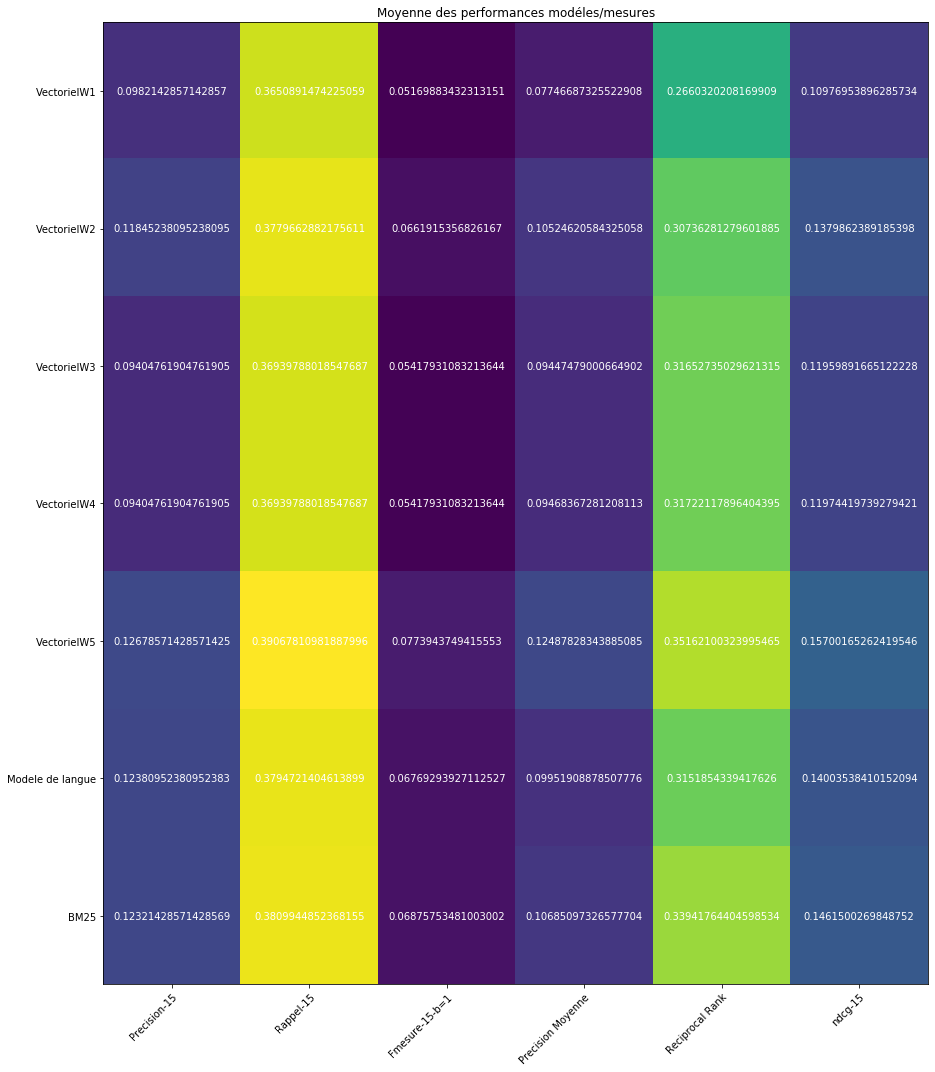

In [20]:
import matplotlib
import matplotlib.pyplot as plt


modeles = ["VectorielW1", "VectorielW2", "VectorielW3", "VectorielW4",
              "VectorielW5", "Modele de langue", "BM25"]
mesures = ["Precision-15", "Rappel-15", "Fmesure-15-b=1",
           "Precision Moyenne", "Reciprocal Rank", "ndcg-15"]

harvest = np.array(mean)


fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(harvest)

ax.set_xticks(np.arange(len(mesures)))
ax.set_yticks(np.arange(len(modeles)))

ax.set_xticklabels(mesures)
ax.set_yticklabels(modeles)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(modeles)):
    for j in range(len(mesures)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Moyenne des performances modéles/mesures")
fig.tight_layout()
plt.show()

### BONUS DU TME 2 :

### Part 1 :

In [86]:
import random
import numpy as np

# step 1 : separation train et test
# ensemble de requêtes que nous avons :
requetes = query_parser.queries
print("total : ",len(requetes))
# separation en train et en test :
# 80% en train et 20% en test
facteur = 0.8 
# On melange aleatoirement notre set avant de séparer le train et le test
keys =  list(requetes.keys())
random.shuffle(keys)
train_length = int(len(keys) * facteur)
test = {id : requetes[id] for id in keys[0:train_length]}
print("test : ",len(test))
train = {id : requetes[id] for id in keys[train_length:]}
print("train : ",len(train))

total :  112
test :  89
train :  23


In [87]:
# step 2 : grid
# on genère la plage sur laquelle on veut tester
k1s = np.arange(0.5, 2, 0.1).tolist()
bs = np.arange(0.3, 1.2, 0.05).tolist()
results_mean = np.zeros((len(k1s),len(bs)))
results_sigma = np.zeros((len(k1s),len(bs)))

In [88]:
print("nombre de combinaisons testées : ",len(k1s)*len(bs))

nombre de combinaisons testées :  270


In [108]:
# step 3 : on teste sur le train toutes les combinaisons possibles, et on genere la matrice de scores
mesure = Fmesure(15,1)
i = 0
for k1 in k1s:
    for b in bs:
        bmtest = Okapi(indexer, k1, b)
        tmp = EvalIRModel().evaluate(bmtest,mesure,train)
        results_mean[k1s.index(k1),bs.index(b)] = tmp[0]
        results_sigma[k1s.index(k1),bs.index(b)] = tmp[1]

In [109]:
# on affiche les meilleurs resultats sur le train
best = np.unravel_index(results_mean.argmax(), results_mean.shape)
print("best params are : k1 = ",k1s[best[0]]," and b = ",bs[best[1]])
print("f1 mesure : ",results_mean[best[0],best[1]])

best params are : k1 =  1.1999999999999997  and b =  1.0499999999999998
f1 mesure :  0.09473485213863597


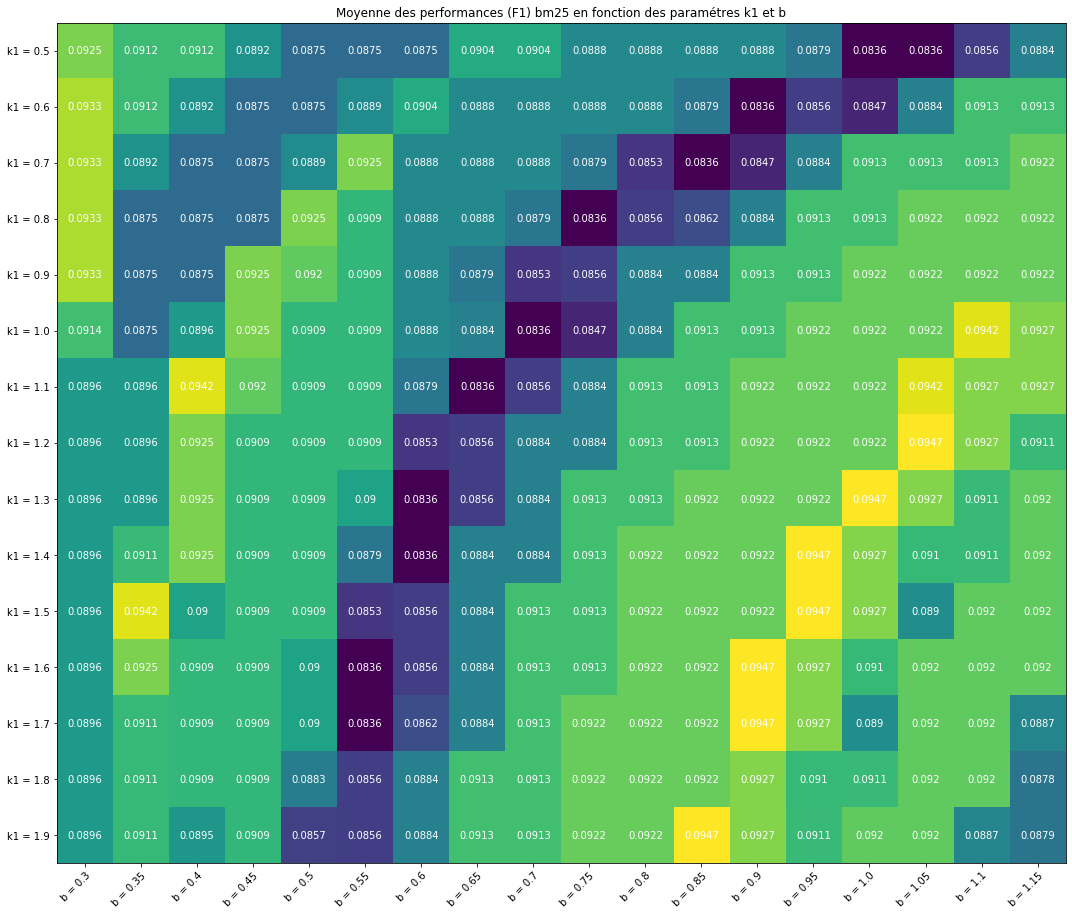

In [110]:
# heat map des resultats
param_k1 = ["k1 = " + str(round(x, 3)) for x in k1s]
param_b = ["b = " +str(round(x, 3)) for x in bs]

res = np.array(results_mean)

fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(res)

ax.set_xticks(np.arange(len(param_b)))
ax.set_yticks(np.arange(len(param_k1)))

ax.set_xticklabels(param_b)
ax.set_yticklabels(param_k1)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(param_k1)):
    for j in range(len(param_b)):
        text = ax.text(j, i, round(res[i, j], 4),
                       ha="center", va="center", color="w")

ax.set_title("Moyenne des performances (F1) bm25 en fonction des paramétres k1 et b")
fig.tight_layout()
plt.show()

In [111]:
# on teste sur le test set en comparant avec les valeurs usuelles :
# avec les valeurs usuelles :
bm = Okapi(indexer, k1 = 1.2, b = 0.75)
val_usuelle = EvalIRModel().evaluate(bm,mesure,test)
print("avec les valeurs usuelles on obtient F1 = ",val_usuelle)

avec les valeurs usuelles on obtient F1 =  [0.06367259150821468, 0.08574798150983896]


In [112]:
# avec les meilleurs valeurs apprises
bmbest = Okapi(indexer, k1 = k1s[best[0]], b = bs[best[1]])
val_best = EvalIRModel().evaluate(bmbest,mesure,test)
print("avec les valeurs apprises on obtient F1 = ",val_best)

avec les valeurs apprises on obtient F1 =  [0.05937542079566799, 0.08094710522332271]


### Part 2 : Cross validation :

In [143]:
print("total : ",len(requetes))
# separation en train et en test :
# taille du fold
facteur2 = 0.2 
# On melange aleatoirement notre set avant de séparer les folds
keys =  list(requetes.keys())
random.shuffle(keys)
# on crée nos folds
fold_length = int(len(keys) * facteur2)
folds = list()
for i in range(0, len(keys), fold_length):
    folds.append(keys[i:i + fold_length])
print(len(folds))

total :  112
6


In [150]:
# on genère la plage sur laquelle on veut tester
k1s = np.arange(0.7, 1.5, 0.1).tolist()
bs = np.arange(0.6, 0.8, 0.05).tolist()
# on cree les matrices qui vont contenir les resultats
results_mean = np.zeros((len(k1s),len(bs)))
results_sigma = np.zeros((len(k1s),len(bs)))
results_mean_general = np.zeros((len(k1s),len(bs)))
results_sigma_general = np.zeros((len(k1s),len(bs)))
print("nombre de combinaisons testées pour chaque fold : ",len(k1s)*len(bs))

nombre de combinaisons testées pour chaque fold :  40



ALGORITHME
* pour chaque fold :
* on génère l'ensemble de train cad : tout les autres folds
* on entraîne sur cet ensemble de train et on génère le score pour chaque combinaison de paramètres : on génère pour chaque fold une matrice comme celle générée à l'étape precedente..
* on somme toutes les matrices générées, les meilleurs parma sont ceux qui maximisent la valeur de la mesure sur cette matrice qui regroupe les resultat de nbr(folds) train

In [151]:
i = 0
# pour chaque fold
for fold in folds :
    print(i)
    i+=1
    # le fold courant ne va être utilisé dans le test
    mesure = Fmesure(15,1)
    i = 0
    # on genere la train set
    train_keys = list(set(keys).symmetric_difference(set(fold)))
    train = {id : requetes[id] for id in train_keys}
    # pour chaque combinaison de paramétres on genere la matrice des scores
    for k1 in k1s:
        for b in bs:
            bmtest = Okapi(indexer, k1, b)
            tmp = EvalIRModel().evaluate(bmtest,mesure,train)
            results_mean[k1s.index(k1),bs.index(b)] = tmp[0]
            results_sigma[k1s.index(k1),bs.index(b)] = tmp[1]
    results_mean_general += results_mean
    results_sigma_general += results_sigma

0
0
0
0
0
0


In [154]:
print(results_mean_general)
# on affiche les meilleurs resultats sur les train (moyenne des matrices pour chaque training set)
best = np.unravel_index(results_mean_general.argmax(), results_mean_general.shape)
print("best params are : k1 = ",k1s[best[0]]," and b = ",bs[best[1]])
print("f1 mesure : ",results_mean_general[best[0],best[1]]/len(folds))

[[0.40307012 0.40905229 0.4071531  0.40316734 0.40484368]
 [0.40905229 0.4071531  0.40478962 0.40590314 0.41115637]
 [0.40797043 0.40478962 0.40484368 0.41277866 0.4106301 ]
 [0.40661204 0.40925326 0.40558233 0.40803354 0.41301562]
 [0.40550821 0.40781297 0.41025269 0.41052508 0.4140941 ]
 [0.40386275 0.4096733  0.40984066 0.41301562 0.41952398]
 [0.40275935 0.40779913 0.4122616  0.41325946 0.41952398]
 [0.40237476 0.40889514 0.40980805 0.41801594 0.41684759]]
best params are : k1 =  1.1999999999999997  and b =  0.8000000000000002
f1 mesure :  0.06992066269943448


> On s'est beacoup approché des valeurs usuelles 1.2 et 0.75